In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import cv2
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters, color,measure

In [ ]:
#Fig=os.path.join("/content/drive/My Drive/Proyecto_ML.rar (Unzipped Files)/Proyecto_ML/figuras.jpg")
Fig=os.path.join("/content/drive/My Drive/Proyecto_ML.rar (Unzipped Files)/Proyecto_ML/foto.jpg")
Figura = Image.open(Fig)

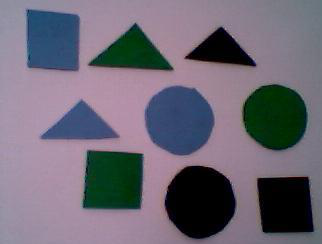

In [ ]:
Figura

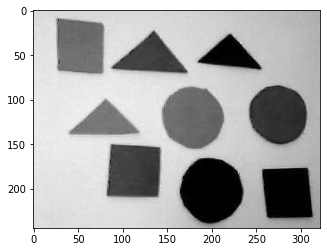

In [ ]:
Figura.convert('L')
ACD=np.array(Figura)
ACD=color.rgb2gray(ACD)
plt.imshow(ACD,cmap='gray')

In [ ]:
from google.colab.patches import cv2_imshow
# Load image, grayscale, Otsu's threshold 
image = cv2.imread(Fig)
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
    
 

In [ ]:
image.shape

(244, 322, 3)

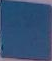

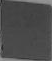

In [ ]:
SHOWING = cv2.imread('ROI_8.png')
cv2_imshow(np.uint8(SHOWING)) 
gray = cv2.cvtColor(SHOWING, cv2.COLOR_BGR2GRAY)
cv2_imshow(np.uint8(gray)) 

In [ ]:
[fil,col,capa]=SHOWING.shape
mitadf=round(fil/2)
mitadc=round(col/2)
coloreval=np.array([SHOWING[mitadf][mitadc][0],SHOWING[mitadf][mitadc][1],SHOWING[mitadf][mitadc][2]])




In [ ]:
coloreval

array([114,  77,  43], dtype=uint8)

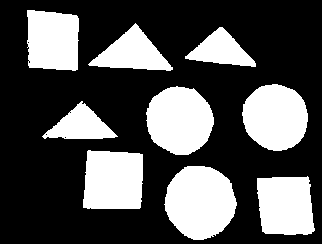

In [ ]:
cv2_imshow(thresh)

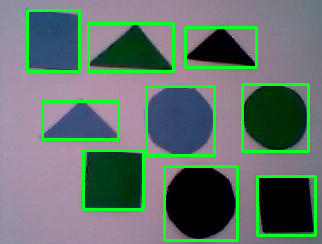

In [ ]:

cv2_imshow(image)


In [ ]:
Imagenes=['ROI_0.png','ROI_1.png','ROI_2.png','ROI_3.png','ROI_4.png','ROI_5.png','ROI_6.png','ROI_7.png','ROI_8.png']


Momentos de Hu

In [ ]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>25:
                z[i,j]=250
    return z

In [ ]:
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

In [ ]:
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clforma = MLPClassifier(solver='lbfgs', alpha=0.001,max_iter=10000,
                  hidden_layer_sizes=(6,5,3))

In [ ]:
X_train,y_train=Lector_forma("/content/drive/My Drive/Proyecto_ML.rar (Unzipped Files)/Proyecto_ML/images/Forma/Train","/content/drive/My Drive/Proyecto_ML.rar (Unzipped Files)/Proyecto_ML/Train_forma.json")

Tag error: desktop.ini
file error: desktop.ini


In [ ]:
X_train

array([[ 2.59405326e-01,  3.09133916e-02,  6.13880006e-03,
         3.98169636e-04, -5.95128918e-07, -6.77211927e-05,
         1.82581552e-07],
       [ 2.02886444e-01,  4.33109840e-03,  4.77973530e-03,
         1.47320455e-04,  1.19870140e-07,  9.04763748e-06,
        -3.02258185e-08],
       [ 1.59365801e-01,  4.76775209e-05,  1.36881255e-06,
         7.57078859e-10, -7.09176749e-18, -2.02090145e-12,
        -2.33169616e-17],
       [ 1.66992852e-01,  1.15236999e-04,  1.27895756e-06,
         1.36204460e-07, -1.17570826e-14, -9.08052061e-10,
        -5.56189192e-14],
       [ 1.59223744e-01,  1.36265771e-05,  5.01660805e-07,
         1.21206297e-10,  9.93178395e-20,  1.21035462e-13,
         9.39900039e-19],
       [ 1.66719514e-01,  1.39508895e-05,  1.05831946e-06,
         1.17762518e-07, -2.37733945e-14,  2.04361853e-10,
         3.41057319e-14],
       [ 2.35452087e-01,  1.86965763e-02,  5.78921379e-03,
         4.93699889e-04,  4.27088289e-07,  1.67515892e-05,
         7.1710252

In [ ]:
clforma.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 5, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
def Hu_C(img):
    label_image=ski.measure.label(img)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

Clasificador por color

In [ ]:
#En BGR
xcolor_train=np.array([[0,0,0],[10,0,62],[20,20,22],[7,7,16],[20,24,22],
                       [0,203,152],[16,156,25],[17,56,0],[92,230,101],[0,255,0],
                       [200,70,49],[145,56,23],[114,75,48],[255,30,0],[153,51,52]])
ycolor_train=np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],
                       [0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],
                       [0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]])

In [ ]:
xcolor_train

array([[  0,   0,   0],
       [ 10,   0,  62],
       [ 20,  20,  22],
       [  7,   7,  16],
       [ 20,  24,  22],
       [  0, 203, 152],
       [ 16, 156,  25],
       [ 17,  56,   0],
       [ 92, 230, 101],
       [  0, 255,   0],
       [200,  70,  49],
       [145,  56,  23],
       [114,  75,  48],
       [255,  30,   0],
       [153,  51,  52]])

In [ ]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=0.001,max_iter=5000,
                  hidden_layer_sizes=(3,3))

In [ ]:
clfcolor.fit(xcolor_train,ycolor_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Evaluación del modelo

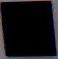

No reconozco qué es la figura  ROI_0.png
[ 1.66961796e-01  3.14682992e-04  6.24596016e-07  1.69718583e-08
  9.63839018e-16 -2.85369597e-10  1.45754601e-15]
[[0 0 0]]
El color es negro
[[0 0 0]]
[[1 0 0]]


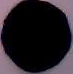

No reconozco qué es la figura  ROI_1.png
[ 1.59482630e-01  5.08738897e-05  3.21206129e-06  1.49078179e-09
 -1.00300729e-16 -1.06277434e-11  2.41212042e-17]
[[0 0 0]]
El color es negro
[[0 0 0]]
[[1 0 0]]


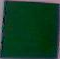

No reconozco qué es la figura  ROI_2.png
[1.66038345e-01 2.15056712e-05 9.98403354e-06 2.27706556e-07
 1.70212921e-13 9.02287011e-10 2.98170299e-13]
[[0 0 0]]
El color es verde
[[17 56  0]]
[[0 1 0]]


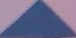

La figura  ROI_3.png es un triángulo
[ 2.22550977e-01  1.41421578e-02  4.70577114e-03  2.22993176e-04
 -1.40050699e-07 -1.98187341e-05 -1.80460454e-07]
[[0 1 0]]
El color es azul
[[121  78  63]]
[[0 0 1]]


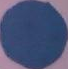

No reconozco qué es la figura  ROI_4.png
[ 1.59391726e-01  4.48363917e-05  5.83209678e-07  1.10760104e-10
 -8.89948388e-19 -7.35511935e-13 -2.11468845e-20]
[[0 0 0]]
El color es azul
[[110  70  51]]
[[0 0 1]]


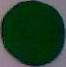

No reconozco qué es la figura  ROI_5.png
[ 1.59601288e-01  9.51705316e-05  8.71815453e-06  6.46252906e-09
 -6.32307855e-17 -1.01343439e-11  1.53266335e-15]
[[0 0 0]]
El color es verde
[[ 4 40  0]]
[[0 1 0]]


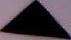

La figura  ROI_6.png es un triángulo
[ 2.21192974e-01  1.32921647e-02  4.81732200e-03  2.25730685e-04
 -1.47480042e-07 -1.90276491e-05  1.83461917e-07]
[[0 1 0]]
No reconozco qué color es
[[0 1 2]]
[[0 0 0]]


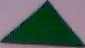

La figura  ROI_7.png es un triángulo
[ 2.19860997e-01  1.12737665e-02  5.36177138e-03  2.01686182e-04
 -1.59661993e-07 -1.77717493e-05 -1.36001111e-07]
[[0 1 0]]
El color es verde
[[14 58  0]]
[[0 1 0]]


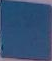

No reconozco qué es la figura  ROI_8.png
[ 1.67555136e-01  5.71565756e-04  3.72520375e-06  1.26339805e-07
  4.14958555e-14  9.62707211e-11 -7.60943787e-14]
[[0 0 0]]
El color es azul
[[114  77  43]]
[[0 0 1]]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for index in range(len(Imagenes)):
  Ima=cv2.imread(Imagenes[index])
  gray = cv2.cvtColor(Ima, cv2.COLOR_BGR2GRAY)
  binario=np.zeros(gray.shape)
  [filas, col]=gray.shape
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  #Se obtienen los momentos de Hu
  hu=Hu_C(thresh)
  pred = clforma.predict([hu])
  plt.figure()
  cv2_imshow(np.uint8(Ima))
  if (np.all(pred==[[1,0,0]])):
    print('La figura ',Imagenes[index],'es un cuadrado')
  elif (np.all(pred==[[0,1,0]])):
    print('La figura ',Imagenes[index],'es un triángulo')
  elif (np.all(pred==[[0, 0,1]])):
    print('La figura ',Imagenes[index],'es un círculo')
  else:
    print('No reconozco qué es la figura ',Imagenes[index])
  print(hu)
  print(pred)
  #COLOR
  mitadf=round(filas/2)
  mitadc=round(col/2)
  coloreval=np.array([[Ima[mitadf][mitadc][0],Ima[mitadf][mitadc][1],Ima[mitadf][mitadc][2]]])
  pred2=clfcolor.predict(coloreval)
  if (np.all(pred2==[[1,0,0]])):
    print('El color es negro')
  elif (np.all(pred2==[[0,1,0]])):
    print('El color es verde')
  elif (np.all(pred2==[[0, 0,1]])):
    print('El color es azul')
  else:
    print('No reconozco qué color es') 
  print(coloreval)
  print(pred2)